## Importing Libraries

In [35]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Importing the Musk data

In [2]:
df=pd.read_csv('musk_csv.csv')
df

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0


In [3]:
df.shape

(6598, 170)

In [4]:
df.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)

In [5]:
df.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [7]:
df.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,...,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,...,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,...,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,37.000000,-193.000000,-137.000000,-70.000000,-117.000000,-28.000000,-159.000000,-85.000000,-217.000000,...,-272.000000,-205.000000,-70.000000,-18.000000,71.000000,166.000000,-68.000000,-179.000000,-9.000000,0.000000
50%,3299.50000,44.000000,-149.000000,-99.000000,-25.000000,-117.000000,33.000000,27.000000,19.000000,-40.000000,...,-234.000000,-131.000000,-21.000000,61.500000,107.000000,191.000000,-60.000000,-150.000000,27.000000,0.000000
75%,4948.75000,53.000000,-95.000000,-19.000000,42.000000,-116.000000,74.000000,57.000000,61.000000,-21.000000,...,-80.000000,52.000000,9.000000,149.000000,129.000000,215.000000,-45.000000,-120.000000,119.000000,0.000000
max,6598.00000,292.000000,95.000000,81.000000,161.000000,325.000000,200.000000,220.000000,320.000000,147.000000,...,94.000000,179.000000,192.000000,411.000000,355.000000,625.000000,295.000000,168.000000,367.000000,1.000000


In [8]:
df.corr()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
ID,1.000000,-0.197844,0.119750,0.179274,0.248703,-0.106119,0.165094,-0.140705,0.430635,-0.179556,...,0.057309,0.046844,-0.224905,-0.148977,-0.328034,0.291805,0.039315,-0.196997,-0.043655,-0.625410
f1,-0.197844,1.000000,-0.142464,-0.164292,-0.291054,0.001037,0.090659,0.071879,-0.416191,0.090701,...,0.010485,0.146428,-0.153096,0.002383,0.634797,-0.061317,0.142004,0.443060,-0.057199,-0.120883
f2,0.119750,-0.142464,1.000000,0.611675,-0.244145,-0.134689,0.125947,-0.449526,0.187318,-0.484187,...,0.172481,0.309392,0.339496,-0.030338,-0.118212,-0.028524,-0.069193,-0.133091,0.046361,-0.099896
f3,0.179274,-0.164292,0.611675,1.000000,-0.378516,-0.080964,0.210432,-0.754798,0.426254,-0.760313,...,0.261200,0.502924,0.259424,-0.020607,-0.206860,-0.131828,-0.111005,-0.086150,0.020434,-0.089760
f4,0.248703,-0.291054,-0.244145,-0.378516,1.000000,-0.044896,-0.222191,0.453786,0.185135,0.420407,...,-0.308906,-0.607435,-0.279430,-0.118705,-0.241346,0.182826,-0.189530,-0.364233,0.072985,-0.098592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f163,0.291805,-0.061317,-0.028524,-0.131828,0.182826,0.027131,0.046881,0.131520,-0.090044,0.127985,...,-0.067344,-0.109691,-0.345939,-0.265327,-0.430409,1.000000,0.463805,-0.259628,-0.321964,-0.217481
f164,0.039315,0.142004,-0.069193,-0.111005,-0.189530,-0.046188,0.024317,0.049882,-0.266026,0.058630,...,0.010607,0.081277,-0.237208,-0.249093,-0.084307,0.463805,1.000000,0.484594,-0.137858,-0.077266
f165,-0.196997,0.443060,-0.133091,-0.086150,-0.364233,-0.090038,0.002557,0.000166,-0.298356,0.016455,...,0.056730,0.177570,-0.105115,-0.193039,0.352140,-0.259628,0.484594,1.000000,0.161670,0.049457
f166,-0.043655,-0.057199,0.046361,0.020434,0.072985,-0.081910,-0.050493,0.004980,0.138932,-0.002590,...,-0.036913,-0.040783,0.110229,-0.333230,0.071019,-0.321964,-0.137858,0.161670,1.000000,0.069114


## Dividing data into dependent and independent variables

In [86]:
x = df.iloc[:,3:169]
y = df.iloc[:,-1]

## Standardizing the data for using PCA

In [87]:
sc=StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))

## Keeping PC as 39 because we our minimum explained ratio was 95 percent 

In [88]:
pca = PCA(n_components=39)
pca.fit(x)
x= pd.DataFrame(pca.transform(x))

In [98]:
exp = pca.explained_variance_ratio_
sum(exp)*100

95.1840274914527

## Dividing data into test train

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

## Model Building

Building the model using three dense layer where 1st layer consist of 12 hidden units using relu activation function and 2nd layer consist of 8 hidden units using relu activation function and 3rd layer consist of 1 hidden unit using sigmoid activation.

In [91]:
model = Sequential()
model.add(Dense(12, input_dim=39, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(x_train, y_train, epochs=10, batch_size=20,validation_split=0.2,verbose = 0)
# evaluate the keras model
_, accuracy = model.evaluate(x_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

5278/5278 [==============================] - 0s 25us/step
Accuracy: 97.33


## Model train and validation data loss plot 

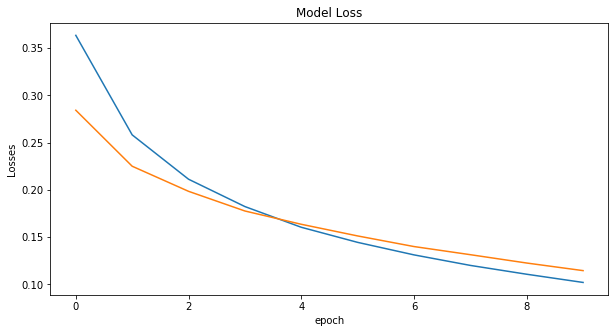

In [92]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Losses')
plt.title('Model Loss')
plt.show()

## Model Accuracy Plot 

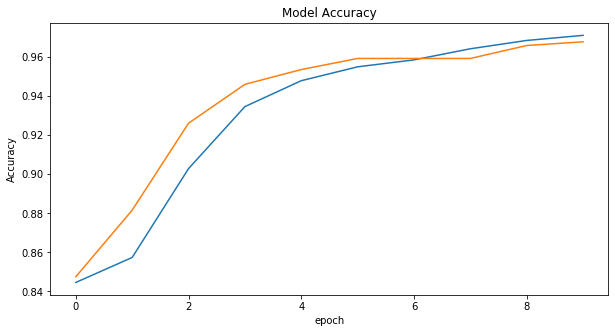

In [93]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

## Prediction using test data

In [94]:
prediction = model.predict(x_test)
rounded = [round(x[0]) for x in prediction]
r = pd.DataFrame(rounded)
r[0].value_counts()

0.0    1141
1.0     179
Name: 0, dtype: int64

## Getting Accuracy

In [95]:
acc1 = accuracy_score(r,y_test)
acc1

0.9674242424242424

## Getting Confusion Matrix

In [96]:
print(confusion_matrix(y_test,r))

[[1109   11]
 [  32  168]]


## Getting Precision, Recall, F1-score

In [97]:
print(classification_report(y_test,r))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1120
           1       0.94      0.84      0.89       200

    accuracy                           0.97      1320
   macro avg       0.96      0.92      0.93      1320
weighted avg       0.97      0.97      0.97      1320

